## <font color=blue>**To build a machine learning model that predicts the product category based on the given input features, we can follow these general steps:**</font>

**Collect and preprocess the data:** Obtain the dataset containing the variables described above, and preprocess it to ensure that the data is clean, consistent, and relevant. This involves handling missing values, encoding categorical variables, and scaling numerical features.


**Perform exploratory data analysis (EDA):** Explore the dataset using statistical methods and data visualization techniques to gain insights into the data and identify any patterns or relationships between the variables. This will help to choose the appropriate machine learning algorithm for the problem.

**Feature engineering & Feature Selection:**  It involves creating new features or transforming existing features to better represent the underlying data. Feature selection involves selecting a subset of the most relevant features to reduce the dimensionality of the data. These two combinely improves model performance, and reduce the risk of overfitting.

**Split the data:** Split the dataset into training and testing sets. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance.

**Choose a machine learning algorithm:** It involves selection of an appropriate machine learning algorithm based on the problem and the characteristics of the dataset. For example, we could use a decision tree, logistic regression, or a neural network.

**Train the model:** Train the machine learning model using the training dataset.

**Evaluate the model:** Evaluate the performance of the machine learning model using the testing dataset. Use appropriate metrics such as accuracy, precision, recall, and F1 score to measure the performance.

**Tune the model:** If the performance of the model is not satisfactory, we can tune the hyperparameters of the machine learning algorithm to improve its performance.

**Deploy the model:** Once the machine learning model has been trained and evaluated, we can deploy it in a production environment to classify raw materials received from vendors.

## <font color=blue>**Loading the required libraries**</font>

In [1]:
# Libraries for creating dataframe and visulizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Libraries for preprocessing the text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
import string
import re


# Libraries for feature engineering, selection and Model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('max_colwidth', None)
pd.set_option('max_columns', None)
pd.set_option("max_rows", None)

In [3]:
# Load your dataset here
data = pd.read_csv("train_set.csv")

In [4]:
data.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Champion Parts Inc SMAP Prototype and Comp Production/Packaging Design,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /Ny 2013-Mar Auto Leasing and Maintenance Other Corporate Services,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real Estate Base Rent Jul2018,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Colonial Trust Iii General Contractor Final Site Clean Up 2005-Dec,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labor Contingent Labor/Temp Labor Corporate Services Human Resources,CLASS-1376


In [5]:
# print the data types of the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5288 entries, 0 to 5287
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inv_Id            5288 non-null   int64  
 1   Vendor_Code       5288 non-null   object 
 2   GL_Code           5288 non-null   object 
 3   Inv_Amt           5288 non-null   float64
 4   Item_Description  5288 non-null   object 
 5   Product_Category  5288 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 248.0+ KB


In [6]:
# print the summary statistics of the variables
data.describe()

,Inv_Id,Inv_Amt
count,5288.000000,5288.000000
mean,19016.049924,49.890034
std,2310.739549,28.835716
min,15001.000000,0.010000
25%,17013.750000,25.062500
50%,19023.000000,49.560000
75%,21004.250000,74.945000
max,23010.000000,99.990000


In [7]:
# print the dimensions of the dataset
data.shape

(5288, 6)

<div class="alert alert-block alert-info">
<b> There are total 5288 products listed in the file. It is multi-label classification problem, where we have a set of target labels. There are multiple categories and items assigned to them, therefore it is multi-class classification problem </b> </div> 

In [8]:
data.isnull().sum()

Inv_Id              0
Vendor_Code         0
GL_Code             0
Inv_Amt             0
Item_Description    0
Product_Category    0
dtype: int64

<div class="alert alert-block alert-info">
    <b>We could see there are no null values(100% fill rate) in the data</b> <br> <br> But in case, if we have missing values we can use the below sample code: <br> Numeric features: data["Inv_Amt"].fillna(data["Inv_Amt"].mean(), inplace=True) <br> Categorical features: data["Vendor_Code"].fillna(data["Vendor_Code"].mode()[0], inplace=True) <br> Text features: data["Item_Description"].fillna("", inplace=True) </div> 

In [9]:
# check for duplicates
print(data.duplicated().sum())

0


## <font color=blue>**Exploratory Data Analysis: EDA**</font>

### 1) Hisogram of Inv_Amount to check for data  distribution

<AxesSubplot:>

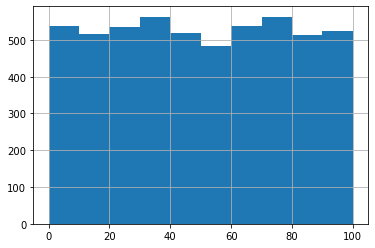

In [10]:
data["Inv_Amt"].hist()             # histogram of Inv_Amt

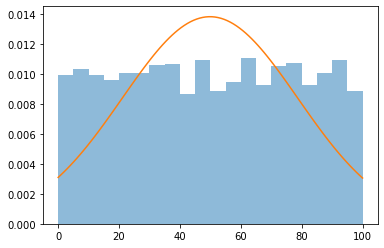

In [11]:
from scipy.stats import norm

# This plot will show us the distribution of Inv_Amt and whether it follows a normal distribution

plt.hist(data["Inv_Amt"], bins=20, density=True, alpha=0.5)

mu, std = norm.fit(data["Inv_Amt"])
x = np.linspace(data["Inv_Amt"].min(), data["Inv_Amt"].max(), 100)
y = norm.pdf(x, mu, std)
plt.plot(x, y)

plt.show()


<div class="alert alert-block alert-info">
<b> Observation:</b> Invoice amount is normally distributed </div> 

### 2) Count of occurance of each category, to check most frequently occuring categories. 

In [12]:
bar_plot = data["Product_Category"].value_counts().rename_axis('Product_Category').to_frame('counts').reset_index()

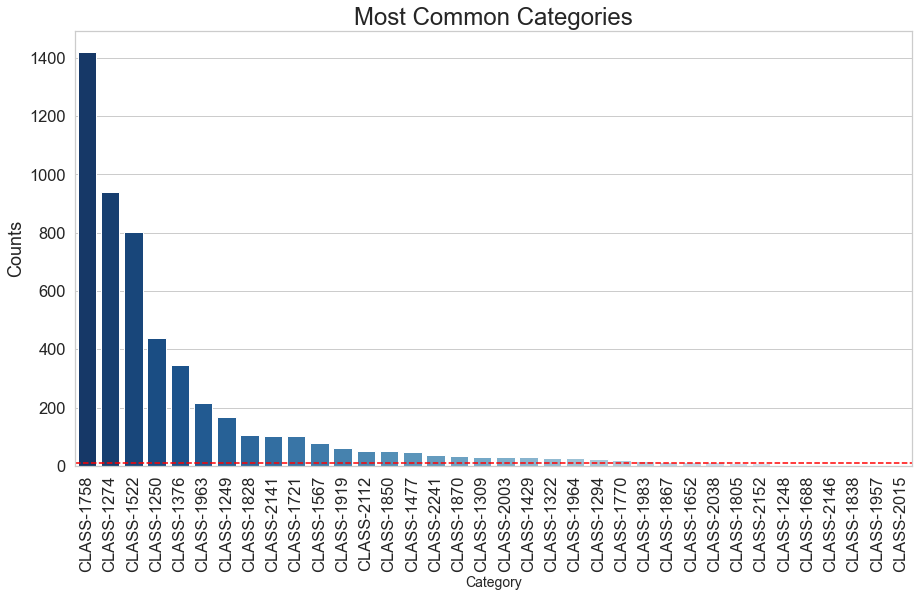

In [13]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.set_style('whitegrid') 

pal = sns.color_palette("Blues_r", len(bar_plot))
rank = bar_plot['counts'].argsort().argsort()  

threshold = 10
sns.barplot(bar_plot['Product_Category'][:60], bar_plot['counts'][:60], palette=np.array(pal[::-1])[rank]) # include first few values
plt.axhline(threshold, ls='--', c='red')
plt.title("Most Common Categories", fontsize=24)
plt.ylabel('Counts', fontsize=18)
plt.xlabel('Category', fontsize=14)
plt.xticks(rotation='vertical')
# plt.xticks(color='w') # comment this to view labels
plt.show()

<div class="alert alert-block alert-info">
<b> Observation:</b> We could see from the above chart that approxiamtely 14 categories has occured <=10 times and the red dotted line indicates threshold of 10 occurences </div> 

### 3) Products Category level analysis

In [14]:
category_data = data.groupby("Product_Category").agg(Inv_Amt = ('Inv_Amt', sum), 
                                                    No_of_Items = ('Item_Description', pd.Series.nunique), 
                                                     No_of_Vendors = ('Vendor_Code', pd.Series.nunique)).reset_index().sort_values(by='Inv_Amt', ascending=False)

In [15]:
category_data.style.format({"Inv_Amt": "₹{:20,.0f}", 
                          "No_of_Items": "{:20,.0f}", 
                                "No_of_Vendors": "{:20,.0f}"})\
                 .hide_index()\
                 .background_gradient(cmap='Blues')

Product_Category,Inv_Amt,No_of_Items,No_of_Vendors
CLASS-1758,"₹ 71,136","1,418",50
CLASS-1274,"₹ 47,154",939,501
CLASS-1522,"₹ 38,625",803,158
CLASS-1250,"₹ 22,903",438,4
CLASS-1376,"₹ 17,815",347,126
CLASS-1963,"₹ 10,231",214,23
CLASS-1249,"₹ 8,688",166,22
CLASS-1828,"₹ 5,639",107,51
CLASS-2141,"₹ 5,021",103,51
CLASS-1721,"₹ 4,600",103,37


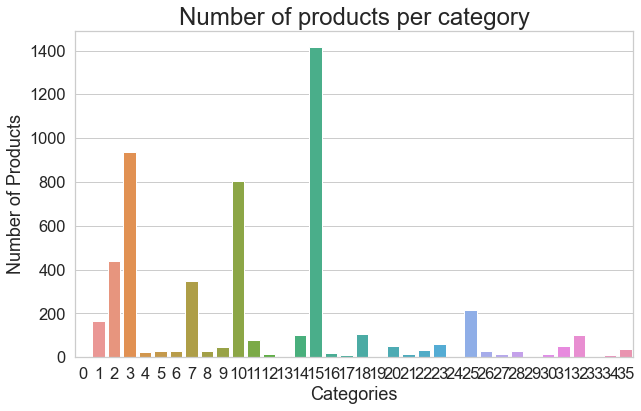

In [16]:
sns.set(font_scale = 1.5)
sns.set_style('whitegrid') 
plt.figure(figsize=(10,6))

sns.barplot(category_data.index, category_data.No_of_Items)
plt.title("Number of products per category", fontsize=24)
plt.ylabel('Number of Products', fontsize=18)
plt.xlabel('Categories', fontsize=18)

plt.show()

<div class="alert alert-block alert-info">
    <b> Observation:</b> Prodcut_Category <b>"CLASS-1758"</b> has highest "Inv_Amount" = 71136.15 and Items = 1418 placed </div> 

<div class="alert alert-block alert-danger">
    <b> Observation:</b> Prodcut_Category <b>"CLASS-1957", "CLASS-1838", "CLASS-2015"</b> has only 1 item classified in thier category. So need more data points for these categories. Alternatively we can include these categories directly into training dataset so, that it can classify similar items from test set </div> 

### 4) Distribution of word frequency for each item description

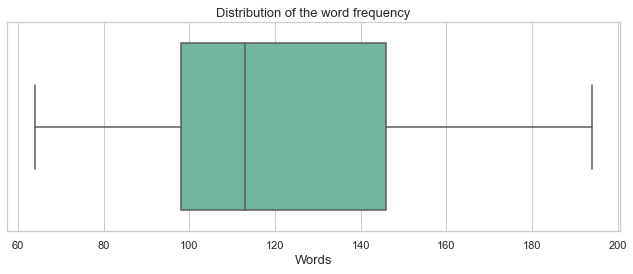

In [17]:
boxplot = data.copy()
boxplot['len'] = data['Item_Description'].apply(lambda x: len(x)) # length of descriptions
     

sns.set(style="whitegrid",rc={"font.size":13,"axes.labelsize":13})
plt.figure(figsize=(9, 4))

ax = sns.boxplot(x='len', data=boxplot, orient="h", palette="Set2")
plt.ylabel('')
plt.xlabel('Words')
plt.title("Distribution of the word frequency", fontsize=13)
plt.tight_layout(h_pad=3)

<div class="alert alert-block alert-info">
<b> Observation:</b> We can observe that most description's length range from 100 too 150 and there are no outliers </div> 

### 5) Vendor_code level analysis

In [18]:
vendor_data = data.groupby('Vendor_Code').agg(Inv_Amt = ('Inv_Amt', sum), 
                                No_of_Items = ('Item_Description', pd.Series.nunique), 
                                No_of_Categories = ('Product_Category', pd.Series.nunique)).reset_index().sort_values(by='No_of_Categories', ascending=False)

In [19]:
vendor_data.style.format({"Inv_Amt": "₹{:20,.0f}", 
                          "No_of_Items": "{:20,.0f}", 
                          "No_of_Categories": "{:20,.0f}",})\
                 .hide_index()\
                 .background_gradient(cmap='Blues')

Vendor_Code,Inv_Amt,No_of_Items,No_of_Categories
VENDOR-2013,"₹ 1,005",20,7
VENDOR-1848,₹ 872,16,4
VENDOR-1554,"₹ 1,894",36,4
VENDOR-1470,₹ 410,7,3
VENDOR-2019,₹ 662,10,3
VENDOR-1096,₹ 145,4,3
VENDOR-2033,₹ 833,13,3
VENDOR-1080,"₹ 3,056",63,3
VENDOR-1941,₹ 500,9,3
VENDOR-1169,₹ 166,2,2


### 6) Correlation matrix

In [20]:
data.corr()                                  # correlation matrix of all variables

,Inv_Id,Inv_Amt
Inv_Id,1.000000,0.020564
Inv_Amt,0.020564,1.000000


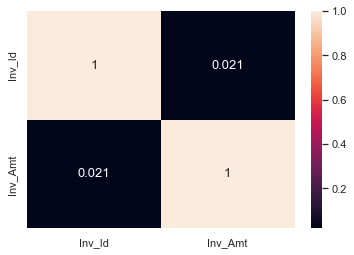

In [21]:
# This plot will show us the correlation between all pairs of variables in the dataset
sns.heatmap(data.corr(), annot=True)
plt.show()


### 7) Crosstab to check for vendors present in across categories

In [22]:
pd.crosstab(data["Vendor_Code"], data["Product_Category"])

Product_Category,CLASS-1248,CLASS-1249,CLASS-1250,CLASS-1274,CLASS-1294,CLASS-1309,CLASS-1322,CLASS-1376,CLASS-1429,CLASS-1477,CLASS-1522,CLASS-1567,CLASS-1652,CLASS-1688,CLASS-1721,CLASS-1758,CLASS-1770,CLASS-1805,CLASS-1828,CLASS-1838,CLASS-1850,CLASS-1867,CLASS-1870,CLASS-1919,CLASS-1957,CLASS-1963,CLASS-1964,CLASS-1983,CLASS-2003,CLASS-2015,CLASS-2038,CLASS-2112,CLASS-2141,CLASS-2146,CLASS-2152,CLASS-2241
Vendor_Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VENDOR-1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
VENDOR-1003,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
VENDOR-1005,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
VENDOR-1006,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
VENDOR-1007,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
VENDOR-1008,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
VENDOR-1010,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
VENDOR-1012,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
VENDOR-1013,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 8) Inv_Amount vs GL_Code, Product_Category distribution 

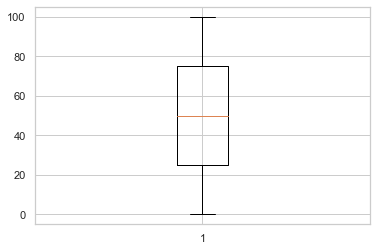

In [23]:
import matplotlib.pyplot as plt

# This plot will show us the median, quartiles, and any outliers in the distribution of Inv_Amt
plt.boxplot(data["Inv_Amt"])
plt.show()


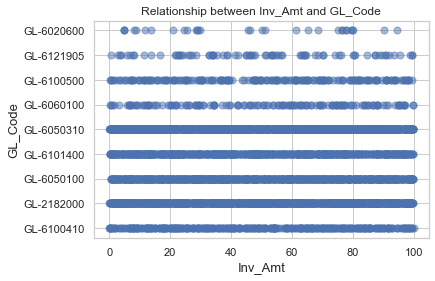

In [24]:
plt.scatter(data["Inv_Amt"], data["GL_Code"], alpha=0.5, s=50)
plt.xlabel("Inv_Amt")
plt.ylabel("GL_Code")
plt.title("Relationship between Inv_Amt and GL_Code")
plt.show()


<AxesSubplot:xlabel='Product_Category', ylabel='Inv_Amt'>

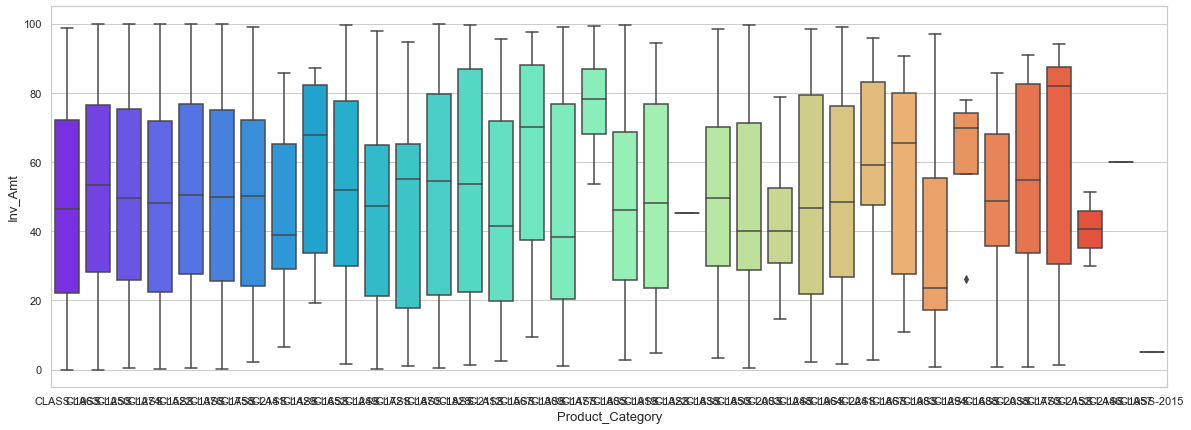

In [25]:
fig_dims = (20, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="Product_Category", y="Inv_Amt", data=data, palette='rainbow')

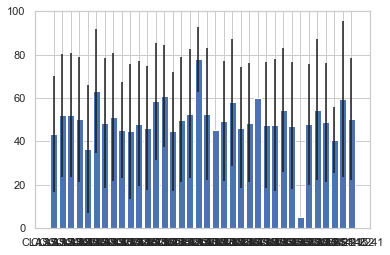

In [26]:
# This plot will show us the mean and standard deviation of Inv_Amt for each Product_Category

means = data.groupby("Product_Category")["Inv_Amt"].mean()
stds = data.groupby("Product_Category")["Inv_Amt"].std()

plt.bar(means.index, means.values, yerr=stds.values)
plt.show()


In [31]:
data.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,1676,6100410,83.24,Artworking/Typesetting Production Jun 2009 Champion Parts Inc SMAP Prototype and Comp Production/Packaging Design,CLASS-1963
1,15002,1883,2182000,51.18,Auto Leasing Corporate Services Corning Inc /Ny 2013-Mar Auto Leasing and Maintenance Other Corporate Services,CLASS-1250
2,15004,1999,6050100,79.02,Store Management Lease/Rent Deltona Corp Real Estate Base Rent Jul2018,CLASS-1274
3,15005,1771,6101400,48.50,Store Construction General Requirements Colonial Trust Iii General Contractor Final Site Clean Up 2005-Dec,CLASS-1522
4,15006,1331,2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labor Contingent Labor/Temp Labor Corporate Services Human Resources,CLASS-1376


### For the GL_Code column, you can remove the "GL-" prefix and convert it to an integer

In [29]:
# define preprocessing function
def preprocess_gl_code(code):
    # remove "GL-" prefix
    code = code.replace("GL-", "")
    # convert to integer
    code = int(code)
    return code

# apply preprocessing function to GL_Code column of training set
data["GL_Code"] = data["GL_Code"].apply(preprocess_gl_code)

In [30]:
# define preprocessing function
def preprocess_vendor_code(code):
    # remove "VENDOR-" prefix
    code = code.replace("VENDOR-", "")
    # convert to integer
    code = int(code)
    return code

# apply preprocessing function to GL_Code column of training set
data["Vendor_Code"] = data["Vendor_Code"].apply(preprocess_vendor_code)

### For the Inv_Amt column, you can round it to 2 decimal places using the round() function

In [32]:
# apply rounding to Inv_Amt column of training set
data["Inv_Amt"] = data["Inv_Amt"].apply(lambda x: round(x, 2))

## <font color=blue>**Transforming Item description column to usefule feature by extracting keywords using NLP techniques like count vectorization / TF-IDF / word2vec**</font>

<div class="alert alert-block alert-success">
<b> Note: </b> In NLP technniques we can use feature selection along with Model building. So there is no need of feature selection separately</div> 

### Some important steps for preprocessing the text-description feature
    1) Making it lower case for uniformity in the words
    2) Removing punctuations and commonly used marks like %, &, @, !, \, / etc. 
    3) Remoning numbers extra spaces and Stopwords
    4) Converting the words to root form

In [33]:
year_pattern = re.compile(r'\b\d{4}\b') # Matches any 4-digit number
month_pattern = re.compile(r'\b(jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)\b') # Matches any month name abbreviation

# Define a function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    text = text.replace(r'/', ' ')
    # Remove punctuation marks, symbols, and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))
    text = year_pattern.sub('', text)
    text = month_pattern.sub('', text)
    # Tokenize text into individual words and get their part of speech
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    # Join words back into a string
    preprocessed_text = " ".join(tokens)
    return preprocessed_text

<div class="alert alert-block alert-success">
<b> Note: </b> Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma. For instance, stemming the word 'Caring' would return 'Car'. For instance, lemmatizing the word 'Caring' would return 'Care'. Stemming is used in case of large dataset where performance is an issue <br> In this particular scenario we no need to go for stemming.</div> 

In [34]:
data["New_Item_Description"] = data["Item_Description"].apply(preprocess_text)

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data["New_Item_Description"] = data["New_Item_Description"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [35]:
data.head(5).style.set_properties(**{'background-color': 'lightgreen'}, subset=['New_Item_Description'])

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,New_Item_Description
0,15001,1676,6100410,83.240000,Artworking/Typesetting Production Jun 2009 Champion Parts Inc SMAP Prototype and Comp Production/Packaging Design,CLASS-1963,artworking typesetting production champion parts inc smap prototype comp production packaging design
1,15002,1883,2182000,51.180000,Auto Leasing Corporate Services Corning Inc /Ny 2013-Mar Auto Leasing and Maintenance Other Corporate Services,CLASS-1250,auto leasing corporate services corning inc ny auto leasing maintenance corporate services
2,15004,1999,6050100,79.020000,Store Management Lease/Rent Deltona Corp Real Estate Base Rent Jul2018,CLASS-1274,store management lease rent deltona corp real estate base rent
3,15005,1771,6101400,48.500000,Store Construction General Requirements Colonial Trust Iii General Contractor Final Site Clean Up 2005-Dec,CLASS-1522,store construction general requirements colonial trust iii general contractor final site clean
4,15006,1331,2182000,63.350000,Jul 2015 Aydin Corp Contingent Labor/Temp Labor Contingent Labor/Temp Labor Corporate Services Human Resources,CLASS-1376,aydin corp contingent labor temp labor contingent labor temp labor corporate services human resources


<div class="alert alert-block alert-info">
<b> You can see the highlighted column with preprocessed text description - "New_Item_Description" </b> </div> 

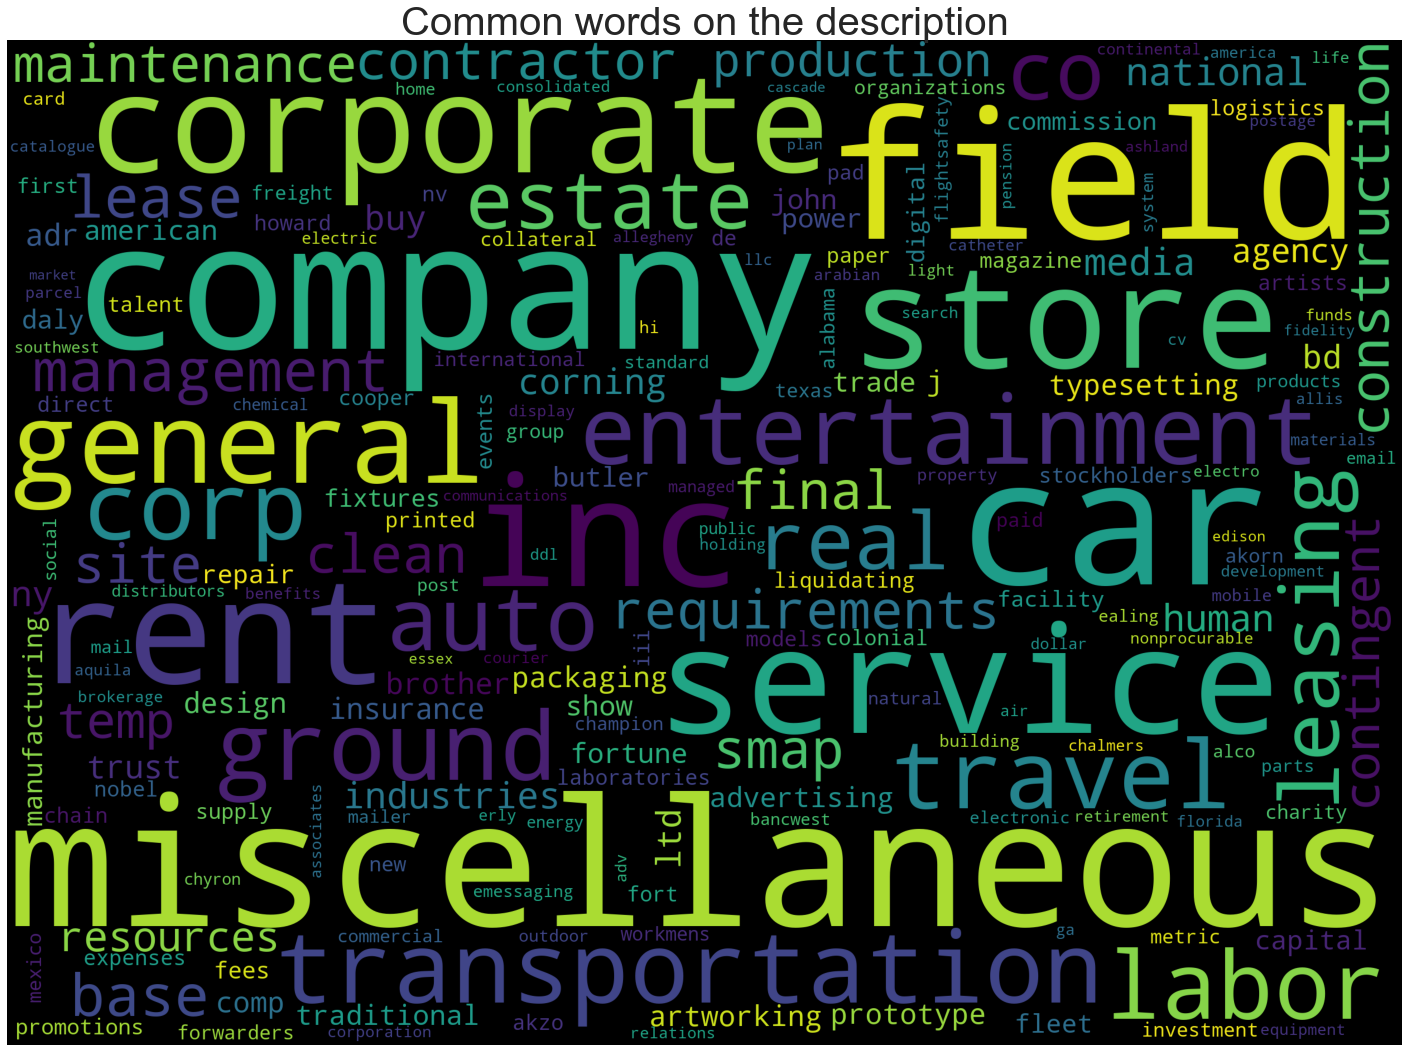

In [36]:
# Visualizing the main context/keywords of the description of products, to better understand the nature of data
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(25,25))
text = data.New_Item_Description.values
cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='black',
                  collocations=False,
                  width=2500,
                  height=1800
                  ).generate(" ".join(text))
plt.axis('off')
plt.title("Common words on the description",fontsize=40)
plt.imshow(cloud)
     

In [37]:
from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    
    for sentence in data["New_Item_Description"].iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
            
    return corpus

In [39]:
corpus = build_corpus(data)        
corpus[0:1]

[['artworking',
  'typesetting',
  'production',
  'champion',
  'parts',
  'inc',
  'smap',
  'prototype',
  'comp',
  'production',
  'packaging',
  'design']]

In [40]:
model = word2vec.Word2Vec(corpus, window=20, min_count=200, workers=4)
# model.wv['leasing']

In [41]:
def tsne_plot(model):

    labels = []
    tokens = []

    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

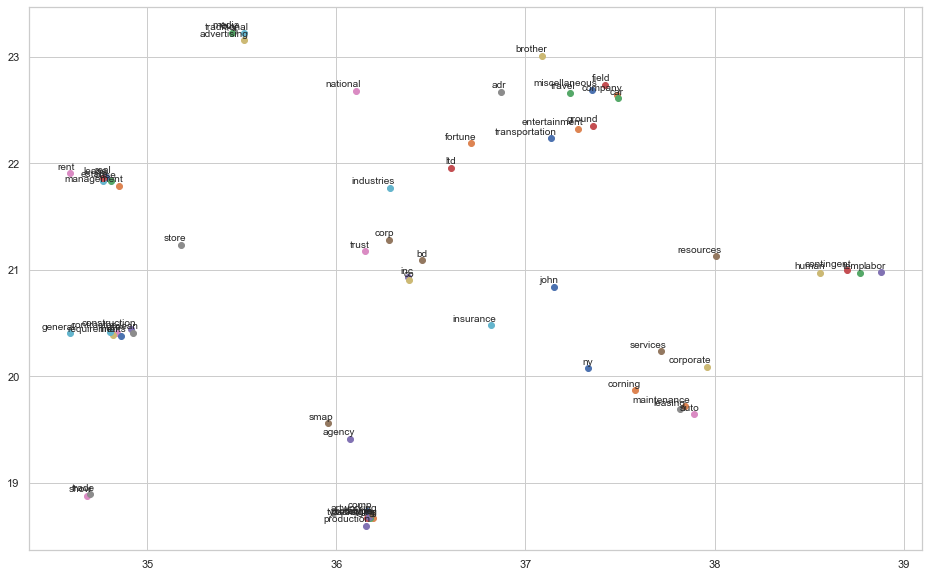

In [39]:
tsne_plot(model)

# Model building to classify the Item_Description to Product Category 

<div class="alert alert-block alert-success">
<b> Note: </b> <br> 1. I had build the model just using Item_Description column as the main feature <br> 2. We can use other columns like Vendor_Code and GL_Code also as the features but, I feel it will complicate the model too much and may cause over fitting <br> 3. And not only that, we can see that few categories have only 1 or 2 items listed and to tackle this either we can incclude these categories in train data as it is even after splitting it for train and test or we can apply Imbalanced techniques like over sampling to duplicate the minority categories or we can also use SMOTE technique <br> 4. I have choosen to go as simple as possible becuase the data is very small <br> 5. I used NLP techcnique called Count Vectorizer which transforms the item description feature to vector form alternatively We can also use TF-IDF and word2vec as well <br> 6. We need to PC if we include other features GL_Code, Vendor_Code, Inv_Amt along with Item_Description column to redcue dimensionality of the data <br> 7. I have written another machine learning Pipeline code in the bottom of this file which has automatic selction of best model and also has hyper parameter tuning </div> 

In [42]:
# Converting text description column to vector form using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['New_Item_Description'])
y = data['Product_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# Train a Random Forest Classifier on the training data
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Evaluate the performance of the classifier on the testing data
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [44]:
from sklearn.metrics import classification_report

# Predict the product categories using the trained model
y_pred = rfc.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

  CLASS-1248       1.00      1.00      1.00         1
  CLASS-1249       1.00      1.00      1.00        38
  CLASS-1250       1.00      1.00      1.00        81
  CLASS-1274       1.00      1.00      1.00       198
  CLASS-1294       1.00      1.00      1.00         4
  CLASS-1309       1.00      1.00      1.00         6
  CLASS-1322       1.00      1.00      1.00        12
  CLASS-1376       1.00      1.00      1.00        73
  CLASS-1429       1.00      1.00      1.00         6
  CLASS-1477       1.00      1.00      1.00        10
  CLASS-1522       1.00      1.00      1.00       142
  CLASS-1567       1.00      1.00      1.00        16
  CLASS-1652       1.00      1.00      1.00         3
  CLASS-1721       1.00      1.00      1.00        19
  CLASS-1758       1.00      1.00      1.00       303
  CLASS-1770       1.00      1.00      1.00         4
  CLASS-1805       1.00      1.00      1.00         3
  CLASS-1828       1.00    

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier on the training data
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Evaluate the performance of the classifier on the testing data
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [44]:
# Predict the product categories using the trained model
y_pred = dtc.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

  CLASS-1248       1.00      1.00      1.00         1
  CLASS-1249       1.00      1.00      1.00        38
  CLASS-1250       1.00      1.00      1.00        81
  CLASS-1274       1.00      1.00      1.00       198
  CLASS-1294       1.00      1.00      1.00         4
  CLASS-1309       1.00      1.00      1.00         6
  CLASS-1322       1.00      1.00      1.00        12
  CLASS-1376       1.00      1.00      1.00        73
  CLASS-1429       1.00      1.00      1.00         6
  CLASS-1477       1.00      1.00      1.00        10
  CLASS-1522       1.00      1.00      1.00       142
  CLASS-1567       1.00      1.00      1.00        16
  CLASS-1652       1.00      1.00      1.00         3
  CLASS-1721       1.00      1.00      1.00        19
  CLASS-1758       1.00      1.00      1.00       303
  CLASS-1770       1.00      1.00      1.00         4
  CLASS-1805       1.00      1.00      1.00         3
  CLASS-1828       1.00    

In [45]:
from sklearn.svm import SVC

# Train an SVM Classifier on the training data
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Evaluate the performance of the classifier on the testing data
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [46]:
# Predict the product categories using the trained model
y_pred = svm.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

  CLASS-1248       1.00      1.00      1.00         1
  CLASS-1249       1.00      1.00      1.00        38
  CLASS-1250       1.00      1.00      1.00        81
  CLASS-1274       1.00      1.00      1.00       198
  CLASS-1294       1.00      1.00      1.00         4
  CLASS-1309       1.00      1.00      1.00         6
  CLASS-1322       1.00      1.00      1.00        12
  CLASS-1376       1.00      1.00      1.00        73
  CLASS-1429       1.00      1.00      1.00         6
  CLASS-1477       1.00      1.00      1.00        10
  CLASS-1522       1.00      1.00      1.00       142
  CLASS-1567       1.00      1.00      1.00        16
  CLASS-1652       1.00      1.00      1.00         3
  CLASS-1721       1.00      1.00      1.00        19
  CLASS-1758       1.00      1.00      1.00       303
  CLASS-1770       1.00      1.00      1.00         4
  CLASS-1805       1.00      1.00      1.00         3
  CLASS-1828       1.00    

In [47]:
from sklearn.naive_bayes import MultinomialNB

# Train a Multinomial Naive Bayes Classifier on the training data
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Evaluate the performance of the classifier on the testing data
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9886578449905482


In [48]:
# Predict the product categories using the trained model
y_pred = nb.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

  CLASS-1248       1.00      1.00      1.00         1
  CLASS-1249       1.00      0.97      0.99        38
  CLASS-1250       0.99      1.00      0.99        81
  CLASS-1274       1.00      1.00      1.00       198
  CLASS-1294       1.00      1.00      1.00         4
  CLASS-1309       1.00      0.33      0.50         6
  CLASS-1322       1.00      1.00      1.00        12
  CLASS-1376       1.00      1.00      1.00        73
  CLASS-1429       1.00      1.00      1.00         6
  CLASS-1477       1.00      1.00      1.00        10
  CLASS-1522       1.00      1.00      1.00       142
  CLASS-1567       1.00      1.00      1.00        16
  CLASS-1652       1.00      1.00      1.00         3
  CLASS-1721       0.66      1.00      0.79        19
  CLASS-1758       1.00      1.00      1.00       303
  CLASS-1770       1.00      1.00      1.00         4
  CLASS-1805       0.00      0.00      0.00         3
  CLASS-1828       0.94    

<div class="alert alert-block alert-success">
<b> Model Results: </b> <br> 1.The dataframe has imbalanced classes, got a pretty high accuracy just by predicting the majority class, but fail to capture the minority class <br> 2. Using simpler metrics like accuracy score can be misleading <br> 3. So we have to consider Precision and recall as best metrics for this <br> 4. For the final submission I had went with RandomForest Classifier and trained on whole data </div> 

# Loading the test dataset and preprocessing on Item_description 

In [49]:
# Load the test data into a pandas dataframe
test_data = pd.read_csv("test_set.csv")

In [50]:
test_data["New_Item_Description"] = test_data["Item_Description"].apply(preprocess_text)

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
test_data["New_Item_Description"] = test_data["New_Item_Description"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Train again on the whole data to predict on test dataset 

In [51]:
# Train a Random Forest Classifier on the training data
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X, y)

RandomForestClassifier(random_state=42)

In [52]:
# Transform the item descriptions using count vectorization and PCA
X_test_cv = vectorizer.transform(test_data["Item_Description"])

# Predict the product categories using the trained Random Forest Classifier model
y_pred = rfc.predict(X_test_cv)

# Add the predicted product categories to the test dataset
test_data["Product_Category"] = y_pred

In [53]:
test_data.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,New_Item_Description,Product_Category
0,15041,VENDOR-1181,GL-6050100,88.80,Base Rent Store Management Aig Equity Sales Corp. Feb-2003 Lease/Rent Real Estate,base rent store management aig equity sales corp lease rent real estate,CLASS-1274
1,15094,VENDOR-1554,GL-6100410,80.08,"Prototype and Comp Production/Packaging Design 2009-Feb SMAP Cv Brokerage, Inc Production Artworking/Typesetting",prototype comp production packaging design smap cv brokerage inc production artworking typesetting,CLASS-1963
2,15112,VENDOR-1513,GL-6050310,24.23,Ground Transportation Travel and Entertainment Miscellaneous Company Car (Field Only) Miscellaneous Company Car (Field Only) Mar 2017 Brother Industries Ltd/Adr/,ground transportation travel entertainment miscellaneous company car field miscellaneous company car field brother industries ltd adr,CLASS-1758
3,15179,VENDOR-1044,GL-6101400,38.85,Store Construction General Requirements Advanced Micro Devices Inc General Contractor Final Site Clean Up Oct-2006,store construction general requirements advanced micro devices inc general contractor final site clean,CLASS-1522
4,15212,VENDOR-1114,GL-6050310,94.15,Travel and Entertainment Miscellaneous Company Car (Field Only) Ground Transportation Miscellaneous Company Car (Field Only) Oct 2017 Allis Chalmers Corp,travel entertainment miscellaneous company car field ground transportation miscellaneous company car field allis chalmers corp,CLASS-1758


In [54]:
# Save the test dataset with the predicted product categories to a CSV file
# test_data[['Inv_Id', 'Product_Category']].to_csv("test_data_predicted_output.csv", index=False)

# Automated Pipeline for Feature Engineering & Best Model Selection with hyper parameter tuning in case of huge data

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['New_Item_Description'], data['Product_Category'], test_size=0.2, random_state=42)

# create a pipeline for each model
svm_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('clf', SVC(random_state=42))
])


rf_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('clf', RandomForestClassifier(random_state=42))
])

nb_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('clf', MultinomialNB())
])

# define the parameter grids for hyperparameter tuning
svm_param_grid = {
    'vectorizer__max_features': [500, 1000, 2000],
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf', 'poly']
}

rf_param_grid = {
    'vectorizer__max_features': [500, 1000, 2000],
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [10, 20, 30]
}

nb_param_grid = {
    'vectorizer__max_features': [500, 1000, 2000],
    'clf__alpha': [0.1, 1, 10],
}

In [ ]:
# perform grid search cross-validation on each pipeline with its respective parameter grid
svm_grid = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, n_jobs=-1)
rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, n_jobs=-1)
nb_grid = GridSearchCV(nb_pipeline, nb_param_grid, cv=5, n_jobs=-1)

# fit the models on the training data
svm_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
nb_grid.fit(X_train, y_train)

# predict on the test data
svm_pred = svm_grid.predict(X_test)
rf_pred = rf_grid.predict(X_test)
nb_pred = nb_grid.predict(X_test)

# print the accuracy scores and classification reports for each model
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))